In [12]:
import xgboost as xgb

clf = xgb.XGBClassifier(seed=42,nthread=1)
clf.__dict__

{'max_depth': 3,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'silent': True,
 'objective': 'binary:logistic',
 'booster': 'gbtree',
 'gamma': 0,
 'min_child_weight': 1,
 'max_delta_step': 0,
 'subsample': 1,
 'colsample_bytree': 1,
 'colsample_bylevel': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'base_score': 0.5,
 'missing': nan,
 'kwargs': {},
 '_Booster': None,
 'seed': 42,
 'random_state': 0,
 'nthread': 1,
 'n_jobs': 1,
 'importance_type': 'gain'}

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
X, y = train.data, train.target
X_test_docs, y_test = test.data, test.target
X_train_docs, X_val_docs, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
tfidf = TfidfVectorizer(min_df =0.005, max_df=0.5).fit(X)
X_train_tfidf = tfidf.transform(X_train_docs).tocsc()
X_val_tfidf = tfidf.transform(X_val_docs).tocsc()
X_test_tfidf = tfidf.transform(X_test_docs).tocsc()

In [15]:
clf = clf.fit(X_train_tfidf, y_train, eval_set = [(X_train_tfidf, y_train), (X_val_tfidf, y_val)], verbose=11)


[0]	validation_0-merror:0.586786	validation_1-merror:0.596111
[11]	validation_0-merror:0.426251	validation_1-merror:0.467079
[22]	validation_0-merror:0.388576	validation_1-merror:0.452939
[33]	validation_0-merror:0.355541	validation_1-merror:0.436147
[44]	validation_0-merror:0.328803	validation_1-merror:0.427751
[55]	validation_0-merror:0.308143	validation_1-merror:0.420681
[66]	validation_0-merror:0.286709	validation_1-merror:0.416703
[77]	validation_0-merror:0.268921	validation_1-merror:0.408749
[88]	validation_0-merror:0.255773	validation_1-merror:0.408749
[99]	validation_0-merror:0.241189	validation_1-merror:0.405656


In [16]:
from sklearn.metrics import accuracy_score

In [18]:
y_pred = clf.predict(X_test_tfidf)
y_preds_probs = clf.predict_proba(X_test_tfidf)
print(f'Test error: {1-accuracy_score(y_test, y_pred)}')

Test error: 0.46534784917684546


In [21]:
results=[]
for max_depth in [3,6,9,12,15,30]:
    clf = xgb.XGBClassifier(max_depth =max_depth, n_estimators=20)
    clf = clf.fit(X_train_tfidf, y_train, eval_set = [(X_train_tfidf, y_train), (X_val_tfidf, y_val)], verbose=10)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': accuracy_score(y_train, clf.predict(X_train_tfidf)),
            'validation_error': 1-accuracy_score(y_val, clf.predict(X_val_tfidf)),
            'test_error': 1-accuracy_score(y_test, clf.predict(X_test_tfidf))
        }
    )

[0]	validation_0-merror:0.586786	validation_1-merror:0.596111
[10]	validation_0-merror:0.43288	validation_1-merror:0.471498
[19]	validation_0-merror:0.396199	validation_1-merror:0.454264
[0]	validation_0-merror:0.473981	validation_1-merror:0.529828
[10]	validation_0-merror:0.343167	validation_1-merror:0.457357
[19]	validation_0-merror:0.293338	validation_1-merror:0.441008
[0]	validation_0-merror:0.416087	validation_1-merror:0.507733
[10]	validation_0-merror:0.27787	validation_1-merror:0.453822
[19]	validation_0-merror:0.221302	validation_1-merror:0.438798
[0]	validation_0-merror:0.383052	validation_1-merror:0.505966
[10]	validation_0-merror:0.233344	validation_1-merror:0.447636
[19]	validation_0-merror:0.167053	validation_1-merror:0.435705
[0]	validation_0-merror:0.357419	validation_1-merror:0.505524
[10]	validation_0-merror:0.193459	validation_1-merror:0.446752
[19]	validation_0-merror:0.133687	validation_1-merror:0.436147
[0]	validation_0-merror:0.296873	validation_1-merror:0.505966


In [23]:
import pandas as pd

In [24]:
df_max_depth = pd.DataFrame(results).set_index('max_depth')

In [26]:
%matplotlib inline

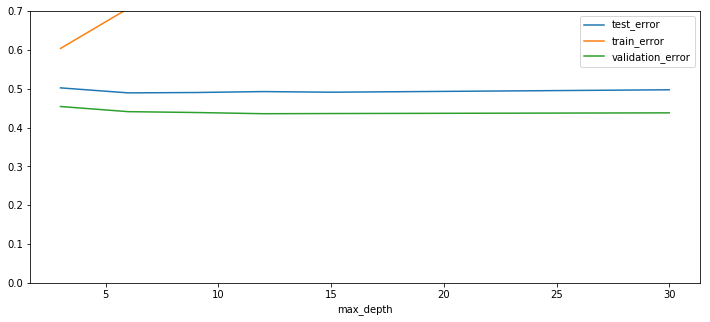

In [27]:
df_max_depth.plot(ylim=(0, 0.7), figsize=(12,5))

In [29]:
import numpy as np

In [31]:
results=[]
for subsample in np.arange(0.2, 1.01, 0.2):
    clf = xgb.XGBClassifier(max_depth =max_depth, n_estimators=20, learning_rate=0.1, subsample=subsample)
    clf = clf.fit(X_train_tfidf, y_train, eval_set = [(X_train_tfidf, y_train), (X_val_tfidf, y_val)], verbose=False)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': accuracy_score(y_train, clf.predict(X_train_tfidf)),
            'validation_error': 1-accuracy_score(y_val, clf.predict(X_val_tfidf)),
            'test_error': 1-accuracy_score(y_test, clf.predict(X_test_tfidf))
        }
    )